# Tweets And Facebook Data Analysis

This notebook analysis the tweets and facebook data between platforms(altmetric.com/Plumx/Plos).

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
origin_folder = 'data/outputs/Nature'

Currently we have data under OR.

## Tweets

In [3]:
df_altmetric_all = pd.read_csv(f'{origin_folder}/article_tweets_altmetric.csv', dtype={'tweet_id':str})
df_plumx = pd.read_csv(f'{origin_folder}/article_tweets_plumx.csv', dtype={'tweet_id':str})


In [4]:
df_altmetric = df_altmetric_all[df_altmetric_all['originalPost'] == True]

doi_list = list(df_altmetric['doi'])
df_plumx['In'] = df_plumx['doi'].apply(lambda x: x in doi_list)
df_plumx = df_plumx[df_plumx['In'] == True]


In [5]:
and_set = set(df_altmetric['tweet_id']) & set(df_plumx['tweet_id'])
len(and_set)

36596

In [6]:
a_b = set(df_altmetric['tweet_id']) - set(df_plumx['tweet_id'])
len(a_b)

34409

In [7]:
b_a = set(df_plumx['tweet_id']) - set(df_altmetric['tweet_id'])
len(b_a)

1322

So in 1282 tweets got by altmetric.com and 1356 tweets got by Plumx in region OR, 832 tweets showed at both sets, 450 are exclusive in altmetric.com and 524 in Plumx.

In [8]:
def ref_clip(x):
    x = str(x).replace('http://www.', '')
    x = str(x).replace('https://www.', '')
    x = str(x).replace('http://', '')
    x = str(x).replace('https://', '')
    return x
df_plumx['ref'] = df_plumx['ref'].apply(lambda x: ref_clip(x))

In [9]:
def ref_domain(x):
    return str(x).split('/')[0]
df_plumx['ref_domain'] = df_plumx['ref'].apply(lambda x: ref_domain(x))
df_plumx

,doi,ref,tweet_id,In,ref_domain
0,10.1038/nature.2016.21130,nature.com/news/is-donald-trump-pushing-more-s...,826311440189435904,True,nature.com
1,10.1038/nature.2016.21130,nature.com/news/is-donald-trump-pushing-more-s...,826056948156076032,True,nature.com
2,10.1038/nature.2016.21130,nature.com/news/is-donald-trump-pushing-more-s...,825318271327010816,True,nature.com
3,10.1038/nature.2016.21130,nature.com/news/is-donald-trump-pushing-more-s...,824787161643937794,True,nature.com
4,10.1038/nature.2016.21130,nature.com/news/is-donald-trump-pushing-more-s...,816080042786754560,True,nature.com
5,10.1038/nature.2016.21130,nature.com/news/is-donald-trump-pushing-more-s...,813632101585129472,True,nature.com
6,10.1038/nature.2016.21130,nature.com/news/is-donald-trump-pushing-more-s...,812251437568823296,True,nature.com
7,10.1038/nature.2016.21130,nature.com/news/is-donald-trump-pushing-more-s...,811784584367079424,True,nature.com
8,10.1038/nature.2016.21130,nature.com/news/is-donald-trump-pushing-more-s...,811626474302124032,True,nature.com
9,10.1038/nature.2016.21130,nature.com/news/is-donald-trump-pushing-more-s...,811586648668508160,True,nature.com


In [10]:
df_plumx['ref_domain'].nunique()

9

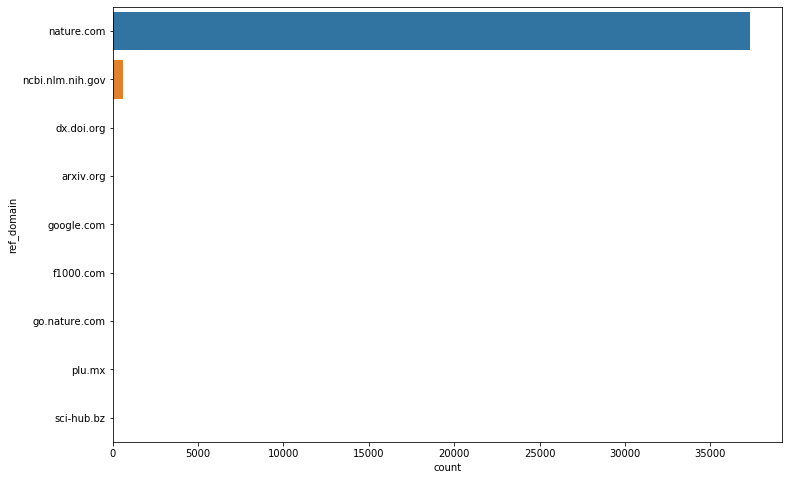

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(y='ref_domain', data=df_plumx)


In [12]:
df_plumx['ref_domain'].value_counts()

nature.com          37344
ncbi.nlm.nih.gov      598
dx.doi.org             40
arxiv.org              31
google.com              6
f1000.com               3
plu.mx                  2
go.nature.com           1
sci-hub.bz              1
Name: ref_domain, dtype: int64

In [13]:
df_plumx['alt_has'] = df_plumx['tweet_id'].apply(lambda x: x in and_set)
df_plumx_and_alt = df_plumx[df_plumx['alt_has']]

In [14]:
df_plumx_and_alt['ref_domain'].value_counts()

nature.com          36388
ncbi.nlm.nih.gov      268
arxiv.org              30
dx.doi.org             12
f1000.com               3
go.nature.com           1
Name: ref_domain, dtype: int64

In [15]:
df_plumx[df_plumx['alt_has'] == True].to_csv(f'{origin_folder}/plumx_tweets_with_alt.csv', index=False)

In [16]:
df_plumx[df_plumx['alt_has'] == False].to_csv(f'{origin_folder}/plumx_tweets_with_alt_exclude.csv', index=False)

In [17]:
df_altmetric['has_plumx'] = df_altmetric['tweet_id'].apply(lambda x: x in and_set)

/Users/mikezhu/Dev/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_altmetric[df_altmetric['has_plumx'] == False].to_csv(f'{origin_folder}/alt_tweets_with_plumx_exclude.csv', index=False)

In [19]:
df_a = df_altmetric.groupby('doi')['tweet_id'].count()
df_p = df_plumx.groupby('doi')['tweet_id'].count()
df_a_p = pd.merge(df_a, df_p, on='doi', how='left')

In [20]:
df_a_p = df_a_p.fillna(0)
df_a_p[['tweet_id_x', 'tweet_id_y']].corr()

,tweet_id_x,tweet_id_y
tweet_id_x,1.000000,0.783941
tweet_id_y,0.783941,1.000000


## All tweets and Original tweets

In [68]:
article_alt_detail = pd.read_csv(f'{origin_folder}/all_altmetric_detail.csv')
article_plumx_detail = pd.read_csv(f'{origin_folder}/all_plumx_detail.csv')

In [69]:
# print(article_alt_detail['DI'].nunique(), article_plumx_detail['DI'].nunique())

In [70]:
article_plumx_detail = article_plumx_detail.rename(columns={'doi':'DI'})
article_plumx_detail = article_plumx_detail.dropna(subset=['DI'])

### All tweets

In [71]:
df_alt_tweets_count = df_altmetric_all.groupby('doi')['tweet_id'].count()
article_alt_detail = article_alt_detail.merge(df_alt_tweets_count, left_on='DI', right_on='doi', right_index=True, how='left')
article_alt_detail = article_alt_detail.rename(columns={"tweet_id": "tweets"})
article_alt_detail['tweets'] = article_alt_detail['tweets'].fillna(0)
article_alt_detail = article_alt_detail.dropna(subset=['DI'])
article_alt_detail


,DI,altmetric_id,blogs,citeulike,dimensions_citation,f1000,facebook pages,mendeley,news outlets,policy,redditors,tweeters,video uploader,weibo,wikipedia,tweets
0,10.1038/d41586-017-00673-z,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.1038/nature.2016.21227,14940825.0,0.0,0.0,0.0,0.0,15.0,0.0,1.0,0.0,0.0,170.0,0.0,0.0,0.0,392.0
2,10.1038/nature.2016.21215,14945045.0,4.0,0.0,0.0,0.0,17.0,1.0,8.0,0.0,5.0,419.0,0.0,0.0,0.0,918.0
3,10.1038/nature.2016.21190,14941736.0,3.0,0.0,3.0,0.0,6.0,5.0,5.0,0.0,1.0,246.0,0.0,0.0,1.0,552.0
4,10.1038/nature.2016.21225,14914290.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,503.0,0.0,0.0,0.0,1136.0
5,10.1038/nature.2016.21216,14913350.0,9.0,0.0,11.0,0.0,19.0,24.0,25.0,0.0,1.0,272.0,0.0,0.0,0.0,608.0
6,10.1038/nature.2016.21218,14891138.0,2.0,0.0,0.0,0.0,13.0,1.0,2.0,0.0,1.0,116.0,0.0,0.0,0.0,248.0
7,10.1038/nature.2016.21093,14885786.0,1.0,0.0,1.0,0.0,17.0,5.0,0.0,0.0,0.0,165.0,0.0,0.0,0.0,356.0
8,10.1038/d41586-017-00564-3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10.1038/nature.2016.21206,14858666.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,115.0,0.0,0.0,0.0,264.0


In [72]:
df_alt_plu_tweets = article_alt_detail[['DI', 'tweets']]
df_alt_plu_tweets = df_alt_plu_tweets.merge(article_plumx_detail[['DI', 'tweets']], on='DI', suffixes=['_alt', '_plu'])

df_alt_plu_tweets.corr()

,tweets_alt,tweets_plu
tweets_alt,1.000000,0.729638
tweets_plu,0.729638,1.000000


### Original tweets

In [73]:
df_alt_tweets_count = df_altmetric.groupby('doi')['tweet_id'].count()
article_alt_detail = article_alt_detail.merge(df_alt_tweets_count, left_on='DI', right_on='doi', right_index=True, how='left')
article_alt_detail = article_alt_detail.rename(columns={"tweet_id": "tweets_original"})
article_alt_detail['tweets_original'] = article_alt_detail['tweets_original'].fillna(0)
article_alt_detail = article_alt_detail.dropna(subset=['DI'])
article_alt_detail

,DI,altmetric_id,blogs,citeulike,dimensions_citation,f1000,facebook pages,mendeley,news outlets,policy,redditors,tweeters,video uploader,weibo,wikipedia,tweets,tweets_original
0,10.1038/d41586-017-00673-z,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.1038/nature.2016.21227,14940825.0,0.0,0.0,0.0,0.0,15.0,0.0,1.0,0.0,0.0,170.0,0.0,0.0,0.0,392.0,198.0
2,10.1038/nature.2016.21215,14945045.0,4.0,0.0,0.0,0.0,17.0,1.0,8.0,0.0,5.0,419.0,0.0,0.0,0.0,918.0,312.0
3,10.1038/nature.2016.21190,14941736.0,3.0,0.0,3.0,0.0,6.0,5.0,5.0,0.0,1.0,246.0,0.0,0.0,1.0,552.0,228.0
4,10.1038/nature.2016.21225,14914290.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,503.0,0.0,0.0,0.0,1136.0,226.0
5,10.1038/nature.2016.21216,14913350.0,9.0,0.0,11.0,0.0,19.0,24.0,25.0,0.0,1.0,272.0,0.0,0.0,0.0,608.0,244.0
6,10.1038/nature.2016.21218,14891138.0,2.0,0.0,0.0,0.0,13.0,1.0,2.0,0.0,1.0,116.0,0.0,0.0,0.0,248.0,114.0
7,10.1038/nature.2016.21093,14885786.0,1.0,0.0,1.0,0.0,17.0,5.0,0.0,0.0,0.0,165.0,0.0,0.0,0.0,356.0,164.0
8,10.1038/d41586-017-00564-3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10.1038/nature.2016.21206,14858666.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,115.0,0.0,0.0,0.0,264.0,114.0


In [74]:
df_plu_tweets_count = df_plumx.groupby('doi')['tweet_id'].count()
article_plumx_detail = article_plumx_detail.merge(df_plu_tweets_count, left_on='DI', right_on='doi', right_index=True, how='left')
article_plumx_detail = article_plumx_detail.rename(columns={"tweet_id": "tweets_original"})
article_plumx_detail['tweets_original'] = article_plumx_detail['tweets_original'].fillna(0)
article_plumx_detail = article_plumx_detail.dropna(subset=['DI'])
article_plumx_detail

,DI,abstruct_views,full_text_views,link_click_count,link_outs,exports_saves,reader_count_mendeley,reader_count_citeulike,cited_by_count_scopus,cited_by_count_crossref,cited_by_count_pubmed,tweets,facebook,news,blogs,reference_count_wikipedia,comment_count_reddit,mention_qa_site_mentions,tweets_original
0,10.1038/nature.2016.21227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,10.1038/nature.2016.21215,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0
2,10.1038/nature.2016.21190,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0.0
3,10.1038/nature.2016.21225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,10.1038/nature.2016.21216,0,0,0,0,0,46,0,0,0,0,0,0,0,0,0,0,0,0.0
5,10.1038/nature.2016.21218,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
6,10.1038/nature.2016.21093,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0.0
7,10.1038/nature.2016.21206,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0
8,10.1038/nature.2016.21193,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0.0
9,10.1038/nature.2016.21192,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0.0


In [75]:
article_alt_detail

,DI,altmetric_id,blogs,citeulike,dimensions_citation,f1000,facebook pages,mendeley,news outlets,policy,redditors,tweeters,video uploader,weibo,wikipedia,tweets,tweets_original
0,10.1038/d41586-017-00673-z,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.1038/nature.2016.21227,14940825.0,0.0,0.0,0.0,0.0,15.0,0.0,1.0,0.0,0.0,170.0,0.0,0.0,0.0,392.0,198.0
2,10.1038/nature.2016.21215,14945045.0,4.0,0.0,0.0,0.0,17.0,1.0,8.0,0.0,5.0,419.0,0.0,0.0,0.0,918.0,312.0
3,10.1038/nature.2016.21190,14941736.0,3.0,0.0,3.0,0.0,6.0,5.0,5.0,0.0,1.0,246.0,0.0,0.0,1.0,552.0,228.0
4,10.1038/nature.2016.21225,14914290.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,503.0,0.0,0.0,0.0,1136.0,226.0
5,10.1038/nature.2016.21216,14913350.0,9.0,0.0,11.0,0.0,19.0,24.0,25.0,0.0,1.0,272.0,0.0,0.0,0.0,608.0,244.0
6,10.1038/nature.2016.21218,14891138.0,2.0,0.0,0.0,0.0,13.0,1.0,2.0,0.0,1.0,116.0,0.0,0.0,0.0,248.0,114.0
7,10.1038/nature.2016.21093,14885786.0,1.0,0.0,1.0,0.0,17.0,5.0,0.0,0.0,0.0,165.0,0.0,0.0,0.0,356.0,164.0
8,10.1038/d41586-017-00564-3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10.1038/nature.2016.21206,14858666.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,115.0,0.0,0.0,0.0,264.0,114.0


In [81]:
df_alt_plu_tweets = article_alt_detail[['DI', 'tweets_original']]
df_alt_plu_tweets = df_alt_plu_tweets.merge(article_plumx_detail[['DI', 'tweets_original']], on='DI', suffixes=['_alt', '_plu'])
df_alt_plu_tweets.corr()

901


,tweets_original_alt,tweets_original_plu
tweets_original_alt,1.00000,0.78399
tweets_original_plu,0.78399,1.00000
